# Project: Investigate a Dataset (TMDb Movie Data)

### Student: Jessika Nunes Caetano

<a id='intro'></a>
## Introduction

> For this project, I chose to investigate the dataset TMDb movie data. According to the dataset options document, this dataset contains information of rating and revenues about 10.000 movies. The data is available in a csv file, which I uploaded to this notebook's folder. In this section, first I will import the packages that I will need, and then I will load the data file ad take a look at the metrics that compose it. 

In [30]:
# Import packages that I will use
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

# Define that visualizations should be plotted inline with the notebook
%matplotlib inline


In [31]:
#Import the dataset
data = pd.read_csv('tmdb-movies.csv')

In [32]:
#Take a look at the dataset
data.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [33]:
#Above, only 20 of the 21 columns of the dataset are shown, so I'll take a look at the list of columns and see what is missing.
list(data.columns)

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

<a id='questions'></a>
#### Proposed Questions
> In the dataset, a lot of infomation os available, such as: revenue, budget, cast, director, genres, vote count and average, and others. For this analysis, I want to investigate which variables influence the score received by the movie and which ones are related to the movie's revenue ans popularity. Therefore, the dependent variables must be avg_score,revenue_adj and popularity. The questions that I will try to answer are the following:
> - Is the movie **revenue** higher when a certain actor/group of actors is part of the cast? Does that also influence the movie's **average vote** or the movie's **popularity**?
> - Is the movie **revenue** higher when a certain person is directing the movie? Does the director also influence the movie's **average vote**  or the movie's **popularity**? 
> - Which genres usually present higher **revenues/scores/popularity**?

>With this questions, I will analyse the following set of variables:

> - Dependent variable 1: **Revenue**. Independent variables: cast, director and genre;
> - Dependent variable 2: **Average Vote**. Independent variables: cast, director and genre;
> - Dependent variable 3: **Popularity**. Independent variables: cast, director and genre.

<a id='wrangling'></a>
## Data Wrangling

### General Properties

> In the previous section, I have loaded the datased an took a look at the metrics that compose it. Now, I will investigate the characteristics os those columns in order to identify changes that are necessary to proceed with the analysis.

>First, let's look at the size of the dataset.

In [34]:
data.shape


(10866, 21)

>As we have seen before, the dataset has 21 columns. I expected it to have 10.000 rows because the data is about 10.000 different movies. So I suspect there are duplicated registers here. Let's check for duplicates.

In [35]:
print(sum(data.duplicated()))
data.nunique()

1


id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

>Apparently, there is only one row in the dataset that is fully duplicated. We will remove it later. The dataset must really have more registers than I expected, considering that the id column have 10.865 unique values (total of 10.866 rows). Nevertheless, the imdb_id column has 10.855 unique values, ten rows less than the id column. Let's check which records are those (I searched the internet and learned how to use the command 'isin' to show the duplicated rows).

In [36]:
print(data[data['imdb_id'].isin(data['imdb_id'][data['imdb_id'].duplicated()])])

          id    imdb_id  popularity    budget  revenue  \
548   355131        NaN    0.108072         0        0   
997   287663        NaN    0.330431         0        0   
1528   15257        NaN    0.607851         0        0   
1750  101907        NaN    0.256975         0        0   
2089   42194  tt0411951    0.596430  30000000   967000   
2090   42194  tt0411951    0.596430  30000000   967000   
2401   45644        NaN    0.067753         0        0   
4797  369145        NaN    0.167501         0        0   
4872  269177        NaN    0.090552         0        0   
6071  279954        NaN    0.004323       500        0   
7527   50127        NaN    0.570337         0        0   
7809   50128        NaN    0.060795         0        0   

                                       original_title  \
548                        Sense8: Creating the World   
997              Star Wars Rebels: Spark of Rebellion   
1528                               Hulk vs. Wolverine   
1750             

>As we can see, the duplicated rows are those we had already found before (in which the whole row is duplicated) and a few other registers with null values in the imdb_id collumn (that is why they were counted as duplicated), but with a unique id. For now, I think we can let those records stay. We wont aplly any numerical operation to it, so we don't need yet to replace the null values. Let's check for other null values in the dataset.

In [37]:
data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

>As we can see, many columns present null values, but the ones that we need to be concerned about are: cast, director and genres. For these are not numerical columns, we will need to drop the rows with null values when we are going to analyse these variables influence in revenue, score and popularity. Once we have unique 10.865 records in this datased, droping those rows won't have much of an impact in the analysis. At last, lets take a look at the datatype of each column.

In [38]:
data.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

>The only column that needed to have its datatype changed is the release_date column. It is formatted as string, but its datatype should be date. On the other hand, I do not plan to use this column in my analysis once I already have the year column, so I won't make this change.

>There is another observation that I have to make about cleaning the dataset: the columns cast, genres and director have many names in one row separated by a '|' caracter. I will have to create one row to each of those names when I'm going to analyse these variables. Also, there are some columns that will not be used in this analysis, so I will drop them.

### Data Cleaning

>First, I am going to drop the duplicate row we found.

In [39]:
data.drop_duplicates(inplace=True)

>Now, let's drop the columns we are not going to use. Note that I will drop the budget and revenue columns because I will use the budget_adj and revenue_adj columns to avoid considering the efects of inflation and other factors in prices (these two columns show budget and revenue in terms of 2010 dollars, according to the dataset options file).

In [40]:
data.drop(['imdb_id', 'budget','revenue','homepage','tagline','keywords','overview','runtime','release_date','production_companies'], axis=1, inplace=True)

>As last, I will create one row to each name in genre, director and cast columns. I will create three different datasets, one for the modification in each of this columns, so the dataset does not get too many rows and the modification in one column does not affect the results of analysis involving other variables.

In [41]:
#First, let's do the process to the genre column. To do that, I will create a new dataset that does not 
#contain null values in the genre column.
data_genre = data[data['genres'].notna()]

#Now, I am going to transform the strings that compose the genre column into lists, 
#so that after I can apply the command 'explode'.
data_genre['genres'] = data_genre['genres'].apply(lambda x: x.split("|"))

# Now, I'll apply the command explode to create one row to each name in the genre rows.
data_genre = data_genre.explode('genres')
print(data_genre)

           id  popularity            original_title  \
0      135397   32.985763            Jurassic World   
0      135397   32.985763            Jurassic World   
0      135397   32.985763            Jurassic World   
0      135397   32.985763            Jurassic World   
1       76341   28.419936        Mad Max: Fury Road   
...       ...         ...                       ...   
10863   39768    0.065141       Beregis Avtomobilya   
10863   39768    0.065141       Beregis Avtomobilya   
10864   21449    0.064317    What's Up, Tiger Lily?   
10864   21449    0.064317    What's Up, Tiger Lily?   
10865   22293    0.035919  Manos: The Hands of Fate   

                                                    cast          director  \
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
0      Chris Pratt|Bryce Da

<ipython-input-41-c2e35429299d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_genre['genres'] = data_genre['genres'].apply(lambda x: x.split("|"))


In [42]:
#I will repeat the process to the column cast.
data_cast = data[data['cast'].notna()]
data_cast['cast'] = data_cast['cast'].apply(lambda x: x.split("|"))
data_cast = data_cast.explode('cast')

#To finish, I will create the director dataframe.
data_director = data[data['director'].notna()]
data_director['director'] = data_director['director'].apply(lambda x: x.split("|"))
data_director = data_director.explode('director')

<ipython-input-42-ab92f6277b23>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cast['cast'] = data_cast['cast'].apply(lambda x: x.split("|"))
<ipython-input-42-ab92f6277b23>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_director['director'] = data_director['director'].apply(lambda x: x.split("|"))


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Is the movie revenue higher when a certain actor/group of actors is part of the cast? Does that also influence the movie's average vote or the movie's popularity?

>First, let's take a look at our variables. Revenue, Vote Average and Popularity are continuous variables, so let's see what we can learn about them using the describe method.

In [43]:
data[data['revenue_adj'].notna()]['revenue_adj'].describe()

count    1.086500e+04
mean     5.136900e+07
std      1.446383e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.370173e+07
max      2.827124e+09
Name: revenue_adj, dtype: float64

>From this data, we can see that the standart deviation of the revenue is higher than the mean revenue, which means that the revenue varies a lot from movie to movie. We can expect that when we see that we have revenues varying from zero to 2.827124e+09 in the data. The quartile information suggest that there is a lot of zero values in the revenue field. If this is the case, and the null values in this field are actually represented by zeros, then the lack of information of a lot of movie's revenue becomes an limitation to our analysis.

In [44]:
print(len(data['revenue_adj']))
print(len(data[data['revenue_adj']==0]))
print(len(data[data['revenue_adj']!=0]))

10865
6016
4849


>As we can see, there are around 6.000 zero values in the revenue field, which is a limitation to our analysis.

In [45]:
print(len(data[data['vote_average']==0]))
data[data['vote_average'].notna()]['vote_average'].describe()

0


count    10865.000000
mean         5.975012
std          0.935138
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

>Unlike what happened to revenue, Vote Average data does not contain zero values. The mean of Vote Average is 5.975012 and this metric does not vary that much (standart deviation < 1) when compared to revenue data.

In [46]:
print(len(data[data['popularity']==0]))
data[data['popularity'].notna()]['popularity'].describe()

0


count    10865.000000
mean         0.646446
std          1.000231
min          0.000065
25%          0.207575
50%          0.383831
75%          0.713857
max         32.985763
Name: popularity, dtype: float64

Popularity column also does not have zero values. Note that the difference between maximum and minimum to this metric is very high, probably because of the presence of outliers. I have an hypothesis that popularity index should go from 0 to 1, and the values in the dataset that are higher than 1 must have been messed up by some problem related to number format. Since I have no information if the index should really go from 0 to 1, this problem is a limitation to our analysis.

>Now, let's see how our categorical variables behave. Since these variables have a lot of unique variables, I decided to analyse them by looking at the number of movies of each category.

In [47]:
aux = data_cast.groupby('cast', as_index=False)['id'].count().sort_values('id', ascending=False)
aux.describe()

,id
count,19026.000000
mean,2.762956
std,4.745779
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,72.000000


>Most artists in the cast list appear to have been in one or two movies (first, second and third quartile values), and there is a group of artists that have been in many more movies (maximum of 72, although 72 is probably an outlier or an very old artist). This can be a limitation to our analysis once most artists in the dataset have been in a small quantity of movies.

In [48]:
aux = data_director.groupby('director', as_index=False)['id'].count().sort_values('id', ascending=False)
aux.describe()

,id
count,5362.000000
mean,2.217643
std,2.588807
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,46.000000


>Same as the cast, most directors appear to have made one or two movies, while a group of directors got closer to the maximum of 46 movies. This is also a limitation, similar to the cast problem. 

In [49]:
aux = data_genre.groupby('genres', as_index=False)['id'].count().sort_values('id', ascending=False)
aux.describe()

,id
count,20.000000
mean,1347.750000
std,1260.308228
min,165.000000
25%,389.500000
50%,1072.500000
75%,1655.750000
max,4760.000000


>In this case, we have a better distribution of movies among categories, although the standart deviation is high compared to the mean, which implies that the number of movies varies a lot from genre to genre.

#### Dependent variable 1: Revenue

>To check if certain actors have great influence in the movie's revenue, let's calculate the mean of the revenue for each actor in the cast list.


In [50]:
#First, let's create a dataframes grouped by cast that shows the sum, the mean of revenue and also the number of movies by actor/actress.
aux = data_cast.groupby('cast', as_index=False).agg(sum_revenue= ('revenue_adj','sum'),mean_revenue=('revenue_adj','mean'),num_movies=('revenue_adj','count'))

#Now, let's create two new dataframes, one sorted by revenue sum and the other sorted by revenue mean.
aux1 = aux.sort_values('sum_revenue', ascending=False).head(10)
aux2 = aux.sort_values('mean_revenue', ascending=False).head(10)

                   cast   sum_revenue  mean_revenue  num_movies
6895      Harrison Ford  1.468348e+10  3.496067e+08          42
17862        Tom Cruise  1.121280e+10  3.030487e+08          37
17877         Tom Hanks  1.067239e+10  2.320084e+08          46
5519        Emma Watson  8.806337e+09  6.290241e+08          14
7244       Ian McKellen  8.671323e+09  3.941510e+08          22
5133       Eddie Murphy  8.572390e+09  2.041045e+08          42
9167        Johnny Depp  8.564524e+09  1.861853e+08          46
4061   Daniel Radcliffe  8.515082e+09  5.321926e+08          16
15798      Rupert Grint  8.358390e+09  5.223994e+08          16
2508       Bruce Willis  8.253051e+09  1.331137e+08          62


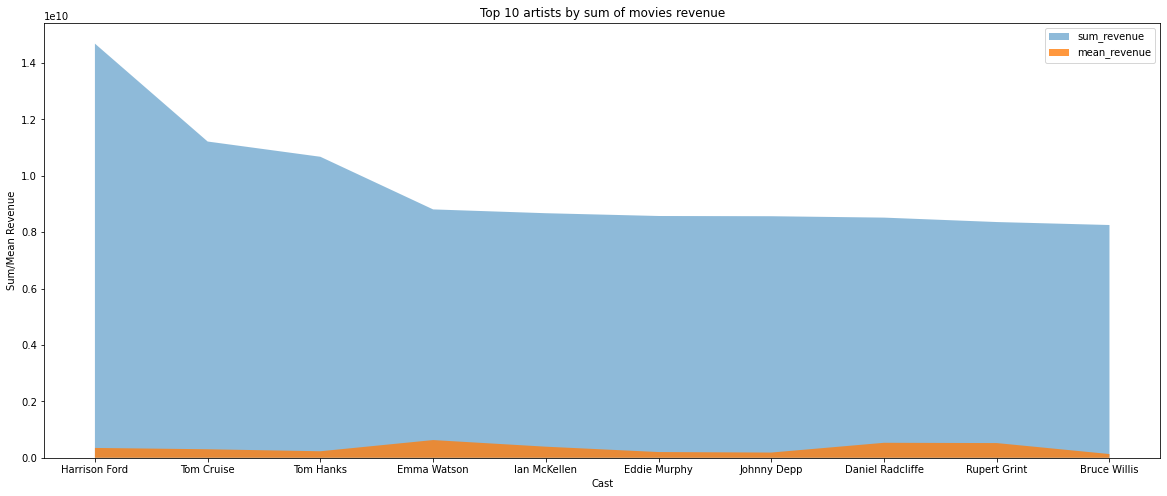

In [51]:
#Now, we can plot the mean and sum of revenue of the top ten artists considering the sum of revenue of the movies they were in.
#First, let's see who are the top ten artists considering the sum of their movies revenues.
plt.figure(figsize=(20, 8))
plt.title('Top 10 artists by sum of movies revenue', loc='center', pad=None)
plt.xlabel('Cast')
plt.ylabel('Sum/Mean Revenue')
print(aux1)
plt.stackplot(aux1['cast'], aux1['sum_revenue'],alpha = 0.5)
plt.stackplot(aux1['cast'], aux1['mean_revenue'],alpha = 0.8)
plt.legend(['sum_revenue','mean_revenue'])

>We can see that Harrison Ford has the highest sum of revenue of the top artists, but when it comes to the mean, Emma Watson, Danniel Radcliffe and Rupert Grint easily win in this set (Congratulations, Harry Potter movies!). Harrison Ford has also the highest sum of revenue because of the quantity of movies he has already been in (42!). Let's see the same analysis considering the top ten by mean.

                        cast   sum_revenue  mean_revenue  num_movies
3898            Daisy Ridley  1.902723e+09  1.902723e+09           1
15401     Robert MacNaughton  1.791694e+09  1.791694e+09           1
1918        Betty Lou Gerson  1.574815e+09  1.574815e+09           1
7453         J. Pat O'Malley  1.574815e+09  1.574815e+09           1
1826              Ben Wright  1.574815e+09  1.574815e+09           1
12015       Martha Wentworth  1.574815e+09  1.574815e+09           1
2122                Bob Peck  1.388863e+09  1.388863e+09           1
11321            Louis Prima  1.345551e+09  1.345551e+09           1
15168  Richard S. Castellano  1.277914e+09  1.277914e+09           1
16128        Santino Fontana  1.192711e+09  1.192711e+09           1


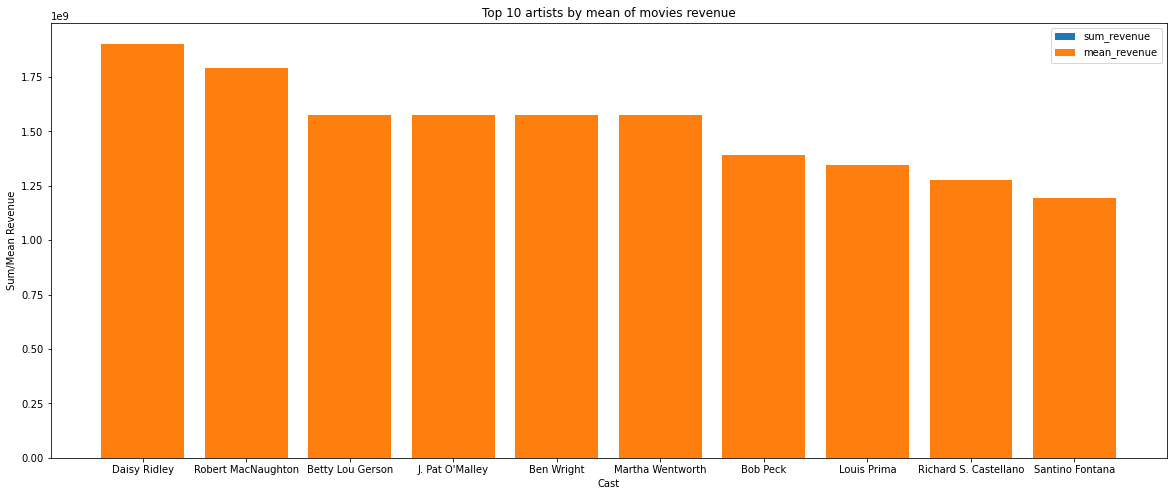

In [52]:
#Let's see who are the top ten artists considering the mean of their movies revenues.
print(aux2)
plt.figure(figsize=(20, 8))
plt.title('Top 10 artists by mean of movies revenue', loc='center', pad=None)
plt.xlabel('Cast')
plt.ylabel('Sum/Mean Revenue')
plt.bar([i for i in range(10)], aux2['sum_revenue'],tick_label=aux2['cast'])
plt.bar([i for i in range(10)], aux2['mean_revenue'],tick_label=aux2['cast'])
plt.legend(['sum_revenue','mean_revenue'])


>We can see in the printed dataset that these artists have only been in one movie. They have made a lot of revenue in that movie, but their presence in the movie does not garantee that they were the reason that the revenue was high. So, let's see the top ten by mean of the artists that made a number of movies bigger then the mean of number of movies per artist.

                   cast   sum_revenue  mean_revenue  num_movies
1243    Anthony Daniels  2.678445e+09  8.928151e+08           3
7243      Ian McDiarmid  3.216058e+09  8.040146e+08           4
15053  Richard Armitage  2.890669e+09  7.226673e+08           4
11284     Lorraine Gary  2.730022e+09  6.825054e+08           4
13233   Murray Hamilton  3.411102e+09  6.822205e+08           5
5519        Emma Watson  8.806337e+09  6.290241e+08          14
14519       Phil Harris  1.815678e+09  6.052261e+08           3
2808      Carrie Fisher  7.685248e+09  5.911729e+08          13
396       Alec Guinness  4.124550e+09  5.892215e+08           7
16760    Skandar Keynes  1.676794e+09  5.589313e+08           3


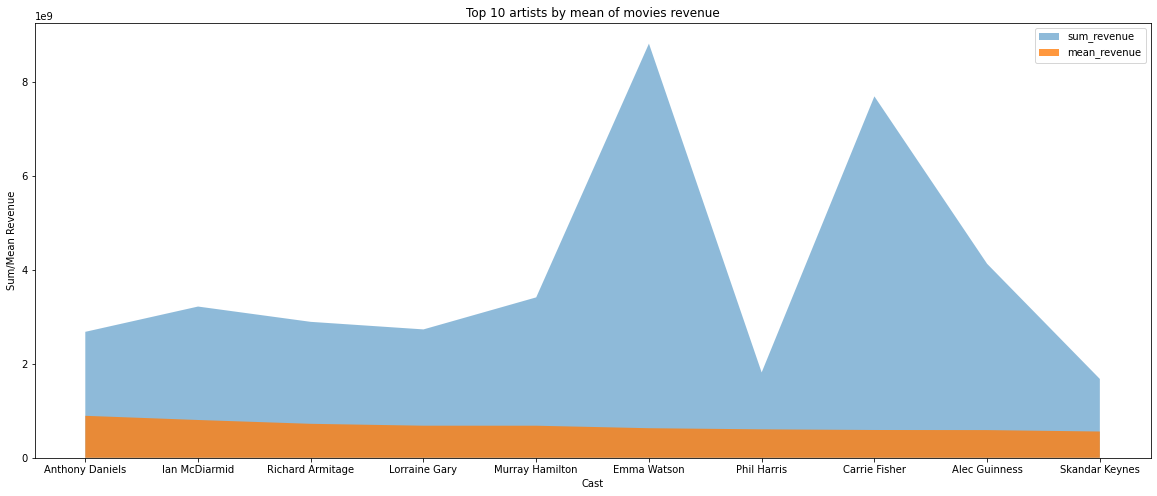

In [53]:
#Now, we can plot the top ten artists who made more than num_movies.mean() considering the mean of revenue of
#the movies they were in.
aux3 = aux[aux['num_movies'] > aux['num_movies'].mean()].sort_values('mean_revenue', ascending=False).head(10)
print(aux3)
plt.figure(figsize=(20, 8))
plt.title('Top 10 artists by mean of movies revenue', loc='center', pad=None)
plt.xlabel('Cast')
plt.ylabel('Sum/Mean Revenue')
plt.legend(['Sum of Revenue','Mean of Revenue'])
plt.stackplot(aux3['cast'], aux3['sum_revenue'], alpha=0.5)
plt.stackplot(aux3['cast'], aux3['mean_revenue'], alpha=0.8)
plt.legend(['sum_revenue','mean_revenue'])

>From this chart we can see a few artists that made the top ten movie revenue mean. When we look at the printed table, we can see that most of these artists were in only 3 or 4 movies. What stands out is that Emma Watson is in the top ten again. She is not the first but she has the highest sum of revenue, a very good mean of revenue and she already has been in 14 movies. We can also cite Carrie Fischer, which is in a similar situation. The thing is, if you look for these last top ten artist in Google you will notice that Emma Watson is much younger than almost all of them, and probably her movies are more recent. Let's see the average year of the movies that these artists were in.

In [54]:
aux4 = data_cast.groupby('cast', as_index=False).agg(sum_revenue= ('revenue_adj','sum'),mean_revenue=('revenue_adj','mean'),num_movies=('revenue_adj','count'),avg_year=('release_year','mean'))
aux4 = aux4[aux4['num_movies'] > aux4['num_movies'].mean()].sort_values('mean_revenue', ascending=False).head(10)
print(aux4)

                   cast   sum_revenue  mean_revenue  num_movies     avg_year
1243    Anthony Daniels  2.678445e+09  8.928151e+08           3  1980.333333
7243      Ian McDiarmid  3.216058e+09  8.040146e+08           4  2001.250000
15053  Richard Armitage  2.890669e+09  7.226673e+08           4  2013.250000
11284     Lorraine Gary  2.730022e+09  6.825054e+08           4  1979.750000
13233   Murray Hamilton  3.411102e+09  6.822205e+08           5  1975.800000
5519        Emma Watson  8.806337e+09  6.290241e+08          14  2008.428571
14519       Phil Harris  1.815678e+09  6.052261e+08           3  1970.000000
2808      Carrie Fisher  7.685248e+09  5.911729e+08          13  1990.692308
396       Alec Guinness  4.124550e+09  5.892215e+08           7  1973.428571
16760    Skandar Keynes  1.676794e+09  5.589313e+08           3  2007.666667


>As I suspected, Emma Watson is in a more recent group of movies, similar to Richard Armitage and Skandar Keynes. I suspect older movies revenues were impacted not only by inflation and similar factors (this effect is theoretically removed with the adjusted values of revenue), but also by of level of access of the population to movies and advances in the technology available to produce movies. Let's see who are the top ten artists with movies more recent and with older movies then the average of year of release.



In [55]:
aux5 = data_cast.groupby('cast', as_index=False).agg(sum_revenue= ('revenue_adj','sum'),mean_revenue=('revenue_adj','mean'),num_movies=('revenue_adj','count'),avg_year=('release_year','mean'))
aux6 = aux5[(aux5['num_movies'] > aux5['num_movies'].mean())&(aux5['avg_year'] > aux5['avg_year'].mean())].sort_values('mean_revenue', ascending=False).head(10)
aux7 = aux5[(aux5['num_movies'] > aux5['num_movies'].mean())&(aux5['avg_year'] <= aux5['avg_year'].mean())].sort_values('mean_revenue', ascending=False).head(10)
print(aux6)
print(aux7)

                   cast   sum_revenue  mean_revenue  num_movies     avg_year
7243      Ian McDiarmid  3.216058e+09  8.040146e+08           4  2001.250000
15053  Richard Armitage  2.890669e+09  7.226673e+08           4  2013.250000
5519        Emma Watson  8.806337e+09  6.290241e+08          14  2008.428571
16760    Skandar Keynes  1.676794e+09  5.589313e+08           3  2007.666667
4061   Daniel Radcliffe  8.515082e+09  5.321926e+08          16  2008.500000
15798      Rupert Grint  8.358390e+09  5.223994e+08          16  2008.812500
7492     Jack Davenport  1.981785e+09  4.954461e+08           4  2003.000000
13926     Orlando Bloom  7.474890e+09  4.396994e+08          17  2006.235294
1131    Anna Popplewell  1.261108e+09  4.203692e+08           3  2008.333333
18708   William Moseley  1.261108e+09  4.203692e+08           3  2008.666667
                     cast   sum_revenue  mean_revenue  num_movies     avg_year
1243      Anthony Daniels  2.678445e+09  8.928151e+08           3  1980.33

#### Dependent variables 2 and 3: Average Vote and Popularity

>Let's now analyse vote_average and popularity. In the case of popularity, we will also separate the artists in two groups: mean of release year of movies higher or lower than the dataset's mean. To both variables, I will consider only those artists who were in more movies than the datasets mean of number of movies per artist.

In [56]:
#Creating the datasets
aux = data_cast.groupby('cast', as_index=False).agg(mean_avg_vote=('vote_average','mean'),mean_popularity=('popularity','mean'),num_movies=('revenue_adj','count'),avg_year=('release_year','mean'))
aux1 = aux[(aux['num_movies'] > aux['num_movies'].mean())].sort_values('mean_avg_vote', ascending=False).head(10)
aux2 = aux[(aux['num_movies'] > aux['num_movies'].mean())&(aux['avg_year'] > aux['avg_year'].mean())].sort_values('mean_popularity', ascending=False).head(10)
aux3 = aux[(aux['num_movies'] > aux['num_movies'].mean())&(aux['avg_year'] <= aux['avg_year'].mean())].sort_values('mean_popularity', ascending=False).head(10)

                       cast  mean_avg_vote  num_movies
11027            Liam Payne       8.200000           3
13490           Niall Horan       8.200000           3
11322       Louis Tomlinson       8.200000           3
6925           Harry Styles       8.200000           3
5961   Francis Ford Coppola       7.900000           3
8292          Jenna Coleman       7.725000           4
1954              Bill Burr       7.660000           5
1141           Anna Wintour       7.566667           3
4220             Dave Grohl       7.520000           5
7981          Jason Baldwin       7.500000           3


<BarContainer object of 10 artists>

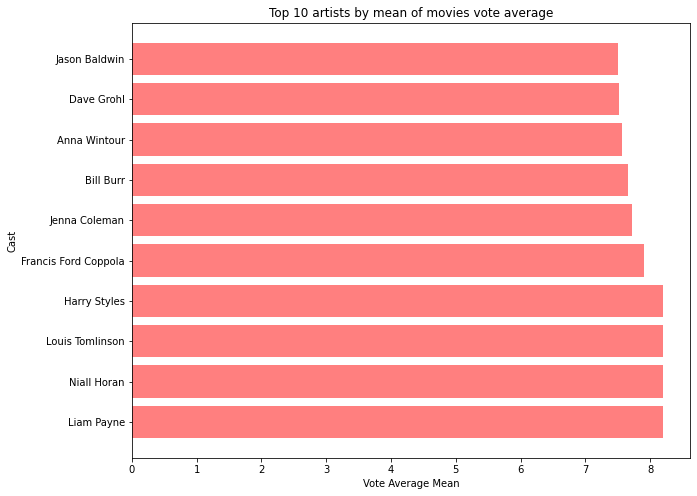

In [57]:
#Printing the top 10 ranking
print(aux1[['cast','mean_avg_vote','num_movies']])
plt.figure(figsize=(10, 8))
plt.title('Top 10 artists by mean of movies vote average', loc='center', pad=None)
plt.xlabel('Vote Average Mean')
plt.ylabel('Cast')
plt.barh([i for i in range(10)], aux1['mean_avg_vote'],tick_label=aux1['cast'],color='red',alpha=0.5)

>From the chart above, we can see that the top 4 in average vote are Harry Styles, Louis Tomlinson, Liam Payne e Niall Horan. When it comes to the older movies, Francis Ford Coppola is the winner. None of the participants of the two lists above have been in more than 5 movies. The score suggests that theses artists are very good at acting, but maybe they can maintain this average because of the few movies we have available to consider.

                      cast  mean_avg_vote  mean_popularity  num_movies  \
13581        Nick Robinson       6.100000         6.882972           5   
17620           Theo James       5.925000         6.767697           4   
7370           Irrfan Khan       6.733333         6.211766           6   
16474         Shane Brolly       6.333333         6.177761           3   
2539   Bryce Dallas Howard       6.442857         5.876791           7   
3246           Chris Pratt       6.130000         5.594719          10   
4209         Dave Bautista       5.766667         5.309473           3   
15053     Richard Armitage       6.825000         5.004955           4   
16461     Shailene Woodley       6.750000         4.131959           6   
5065         Dylan O'Brien       6.833333         4.030140           3   

          avg_year  
13581  2010.600000  
17620  2014.000000  
7370   2010.833333  
16474  2006.000000  
2539   2009.285714  
3246   2011.700000  
4209   2013.333333  
15053  2013.25000

<BarContainer object of 10 artists>

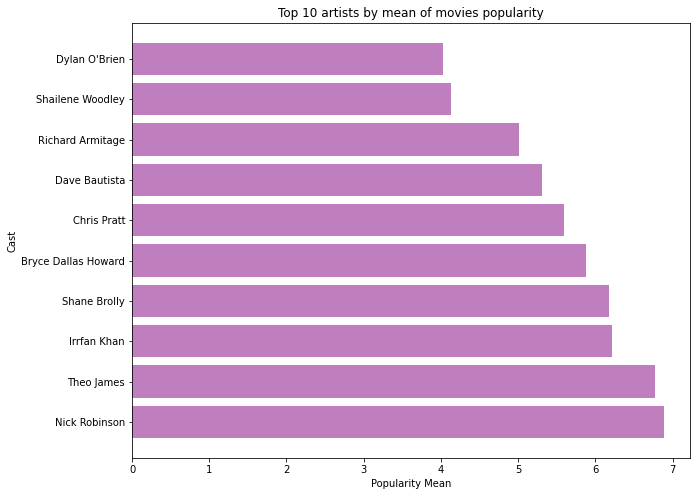

In [58]:
#Printing the top 10 ranking
print(aux2)
plt.figure(figsize=(10, 8))
plt.title('Top 10 artists by mean of movies popularity', loc='center', pad=None)
plt.xlabel('Popularity Mean')
plt.ylabel('Cast')
plt.barh([i for i in range(10)], aux2['mean_popularity'],tick_label=aux2['cast'],color='purple',alpha=0.5)

                     cast  mean_avg_vote  mean_popularity  num_movies  \
7182     Hugh Keays-Byrne       6.266667        10.211471           3   
1243      Anthony Daniels       6.333333         3.630353           3   
2808        Carrie Fisher       6.361538         3.059257          13   
13241  Mykelti Williamson       6.466667         2.994718           3   
16321       Scott Weinger       6.433333         2.552223           3   
11091        Linda Larkin       6.433333         2.552223           3   
396         Alec Guinness       6.942857         2.365942           7   
17646    Thomas F. Wilson       6.225000         2.332113           4   
12661       Michael Gough       6.700000         2.318237           3   
14519         Phil Harris       6.966667         2.253384           3   

          avg_year  
7182   1997.666667  
1243   1980.333333  
2808   1990.692308  
13241  1993.666667  
16321  1994.000000  
11091  1994.000000  
396    1973.428571  
17646  1994.000000  
12661  

<BarContainer object of 10 artists>

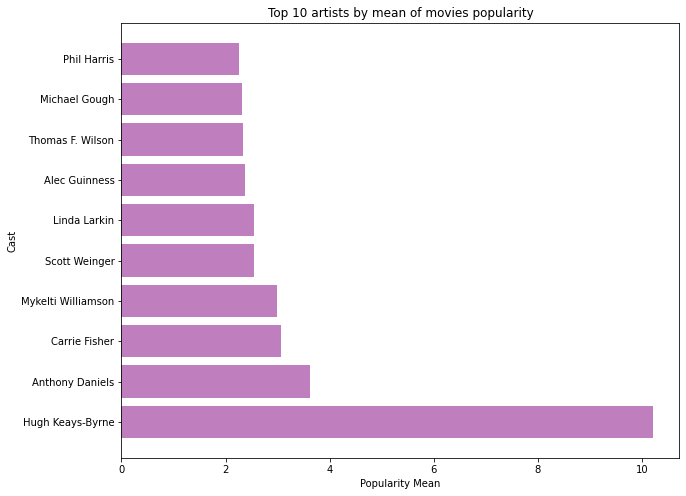

In [59]:
#Printing the top 10 ranking
print(aux3)
plt.figure(figsize=(10, 8))
plt.title('Top 10 artists by mean of movies popularity', loc='center', pad=None)
plt.xlabel('Popularity Mean')
plt.ylabel('Cast')
plt.barh([i for i in range(10)], aux3['mean_popularity'],tick_label=aux3['cast'],color='purple',alpha=0.5)

>About these last two charts we can say that Hugh Keays-Byrne stands out when it comes to popularity of older movies. In the new movies, the winners are Nick Robinson and Theo James. Popularity does not seem to have any relation to average vote. The cited artist have not made more than 5 movies, so I believe the champions of popularity are Carrie Fischer and Chris Pratt, with 13 and 10 movies, respectively.

### Research Question 2: Is the movie revenue higher when a certain person is directing the movie? Does the director also influence the movie's vote average  or the movie's popularity? 

In [60]:
#I will start by creating all the dataframes that I will need based on what was done in the first section.
aux = data_director.groupby('director', as_index=False).agg(sum_revenue= ('revenue_adj','sum'),mean_revenue=('revenue_adj','mean'),mean_avg_vote=('vote_average','mean'),mean_popularity=('popularity','mean'),num_movies=('revenue_adj','count'),avg_year=('release_year','mean'))
aux1 = aux[aux['num_movies'] > aux['num_movies'].mean()]
aux2 = aux[(aux['num_movies'] > aux['num_movies'].mean())&(aux['avg_year'] > aux['avg_year'].mean())]
aux3 = aux[(aux['num_movies'] > aux['num_movies'].mean())&(aux['avg_year'] <= aux['avg_year'].mean())]

#### Dependent variable 1: Revenue

              director   sum_revenue  mean_revenue  num_movies     avg_year
4857  Steven Spielberg  1.526692e+10  5.088975e+08          30  1993.366667
2124     James Cameron  7.327221e+09  6.661110e+08          11  1994.090909
4013     Peter Jackson  7.019848e+09  5.014177e+08          14  2000.857143
1777      George Lucas  6.313919e+09  1.052320e+09           6  1987.833333
4372   Robert Zemeckis  5.655648e+09  3.326852e+08          17  1995.529412
3471       Michael Bay  5.460672e+09  4.964247e+08          11  2004.727273
821     Chris Columbus  5.094077e+09  3.638627e+08          14  1999.071429
4981        Tim Burton  4.660141e+09  2.330071e+08          20  1998.400000
4418        Ron Howard  4.527095e+09  2.057771e+08          22  1997.818182
4263      Ridley Scott  4.219566e+09  1.834594e+08          23  1998.695652


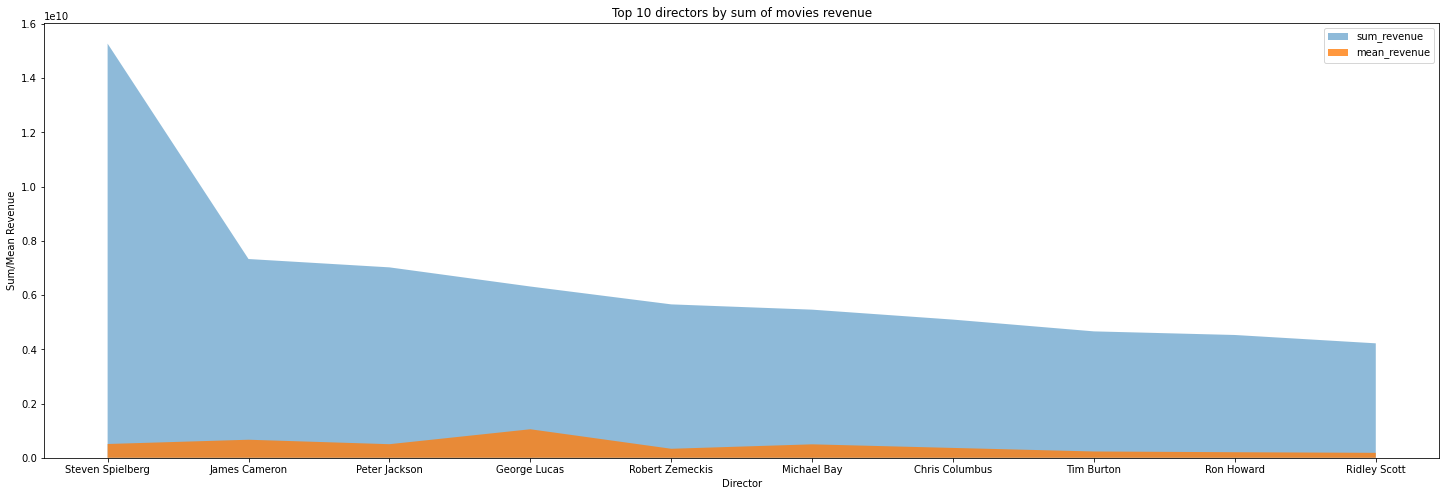

In [61]:
#Printing the top 10 ranking
aux4 = aux1.sort_values('sum_revenue', ascending=False).head(10)
print(aux4[['director','sum_revenue','mean_revenue','num_movies','avg_year']])
plt.figure(figsize=(25, 8))
plt.title('Top 10 directors by sum of movies revenue', loc='center', pad=None)
plt.xlabel('Director')
plt.ylabel('Sum/Mean Revenue')
plt.stackplot(aux4['director'], aux4['sum_revenue'], alpha=0.5)
plt.stackplot(aux4['director'], aux4['mean_revenue'], alpha=0.8)
plt.legend(['sum_revenue','mean_revenue'])


>Steven Spielberg is from far the top 1 of highest sum of movies revenue. We can relate that to the number of movies that he have already made (29!), which is much more than many of the others in the list. But we can see that, in case of the directors, despite what we saw when looking at cast, all of the diretors in the top 10 have made a considerable amount of movies. We can also see that in this case, the average release year of movies is not so different among the directors, and tend to include older movies.

            director   sum_revenue  mean_revenue  num_movies     avg_year
1777    George Lucas  6.313919e+09  1.052320e+09           6  1987.833333
3091     Lee Unkrich  3.416071e+09  8.540177e+08           4  2003.250000
4092   Pierre Coffin  2.516372e+09  8.387905e+08           3  2012.666667
1276     David Yates  4.177455e+09  8.354911e+08           5  2008.400000
967    Conrad Vernon  2.159055e+09  7.196849e+08           3  2008.333333
2068     J.J. Abrams  3.414677e+09  6.829354e+08           5  2010.800000
2124   James Cameron  7.327221e+09  6.661110e+08          11  1994.090909
264   Andrew Stanton  2.308840e+09  5.772101e+08           4  2005.250000
5060     Tom McGrath  2.237664e+09  5.594160e+08           4  2008.750000
2778     Joss Whedon  2.779224e+09  5.558448e+08           5  2010.400000


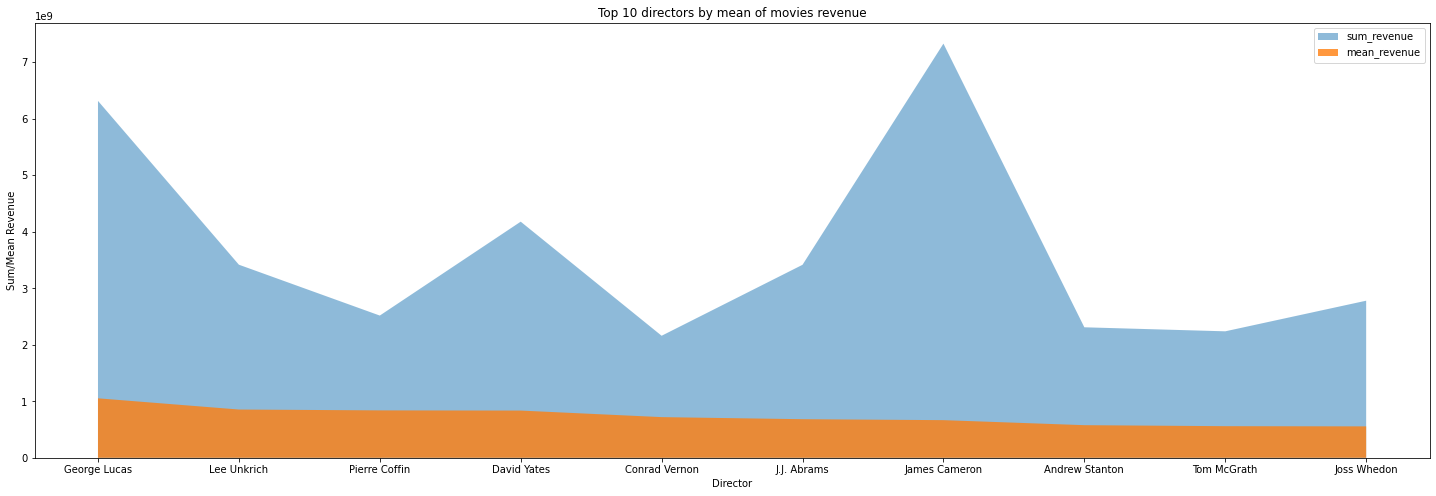

In [62]:
#Printing the top 10 ranking
aux5 = aux1.sort_values('mean_revenue', ascending=False).head(10)
print(aux5[['director','sum_revenue','mean_revenue','num_movies','avg_year']])
plt.figure(figsize=(25, 8))
plt.title('Top 10 directors by mean of movies revenue', loc='center', pad=None)
plt.xlabel('Director')
plt.ylabel('Sum/Mean Revenue')
plt.stackplot(aux5['director'], aux5['sum_revenue'], alpha = 0.5)
plt.stackplot(aux5['director'], aux5['mean_revenue'], alpha = 0.8)
plt.legend(['sum_revenue','mean_revenue'])

>Here we can see that George Lucas had the best average revenue per movie, and he was fourth in the top ten by sum of revenue. In the case of directors, two of them compose not only the mean revenue top ten but also the sum revenue top ten: George Lucas and James Cameron, so we can say that these directors are more common to have higher revenues in their movies.

#### Dependent variable 2: Average Vote

               director  mean_avg_vote  num_movies     avg_year
4562      Scot McFadyen       8.233333           3  2008.000000
4504           Sam Dunn       7.950000           4  2008.000000
23          Adam Curtis       7.900000           3  2007.000000
3916       Paul Dugdale       7.733333           3  2012.333333
1383     Don Hertzfeldt       7.700000           3  2009.000000
4656    Shannon Hartman       7.566667           6  2010.333333
906   Christopher Nolan       7.470000          10  2005.200000
4741        Stan Lathan       7.466667           3  1996.000000
3158         Louis C.K.       7.433333           6  2009.666667
112      Albert Maysles       7.433333           3  1986.333333


<BarContainer object of 10 artists>

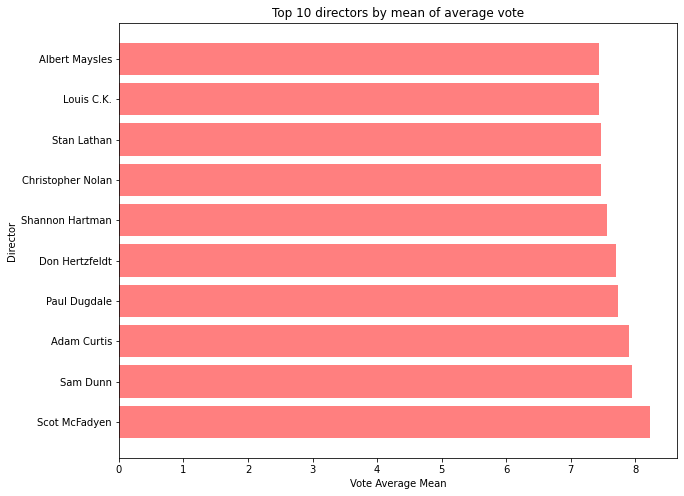

In [63]:
#Printing the top 10 ranking
aux6 = aux1.sort_values('mean_avg_vote', ascending=False).head(10)
print(aux6[['director','mean_avg_vote','num_movies','avg_year']])
plt.figure(figsize=(10, 8))
plt.title('Top 10 directors by mean of average vote', loc='center', pad=None)
plt.ylabel('Director')
plt.xlabel('Vote Average Mean')
plt.barh([i for i in range(10)], aux6['mean_avg_vote'],tick_label=aux6['director'],color='red',alpha=0.5)

>When it comes to movie vote average, it seems that more recent movies have better score. Most of the directors that made it to the top ten of mean vote average have not made more than three movies, except for Christopher Nolan, so I conclude that he is more common to have higher vote average score in their movies.

#### Dependent variable 3: Popularity

In [64]:
#Sorting dataframes to create the ranking
aux7 = aux2.sort_values('mean_popularity', ascending=False).head(10)
aux8 = aux3.sort_values('mean_popularity', ascending=False).head(10)

               director  mean_popularity  num_movies     avg_year
906   Christopher Nolan         6.195521          10  2005.200000
4092      Pierre Coffin         5.041612           3  2012.666667
2068        J.J. Abrams         4.800957           5  2010.800000
2485          Joe Russo         4.667042           3  2007.333333
337       Anthony Russo         4.667042           3  2007.333333
1637   Francis Lawrence         4.437604           6  2010.833333
3096        Len Wiseman         4.380968           4  2007.000000
2146         James Gunn         4.174092           4  2010.750000
1276        David Yates         4.163195           5  2008.400000
3970        Pete Docter         3.891359           4  2006.500000


<BarContainer object of 10 artists>

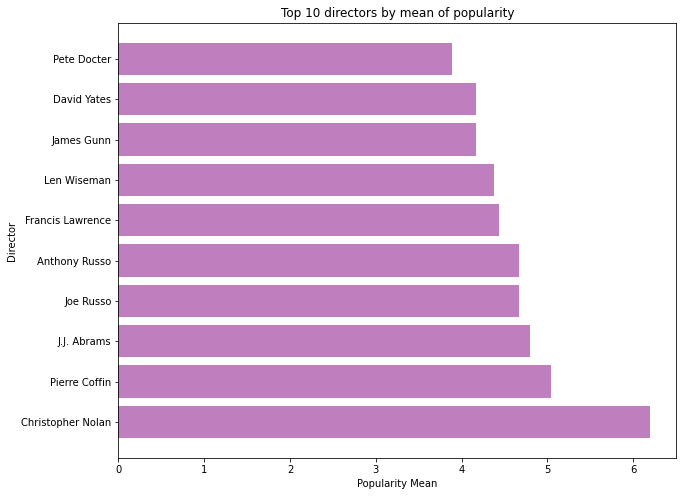

In [65]:
#Printing the top 10 ranking
print(aux7[['director','mean_popularity','num_movies','avg_year']])
plt.figure(figsize=(10, 8))
plt.title('Top 10 directors by mean of popularity', loc='center', pad=None)
plt.ylabel('Director')
plt.xlabel('Popularity Mean')
plt.barh([i for i in range(10)], aux7['mean_popularity'],tick_label=aux7['director'],color='purple',alpha=0.5)

               director  mean_popularity  num_movies     avg_year
1777       George Lucas         3.910306           6  1987.833333
1780      George Miller         3.766965          10  1993.700000
4114  Quentin Tarantino         3.694476          14  2002.714286
4013      Peter Jackson         3.505788          14  2000.857143
1168      David Fincher         3.447978          10  2003.500000
171     Alfonso CuarÃ³n         2.866850           5  2003.200000
2602        John Musker         2.855968           6  1995.833333
4415       Ron Clements         2.855968           6  1995.833333
3091        Lee Unkrich         2.791537           4  2003.250000
2124      James Cameron         2.655021          11  1994.090909


<BarContainer object of 10 artists>

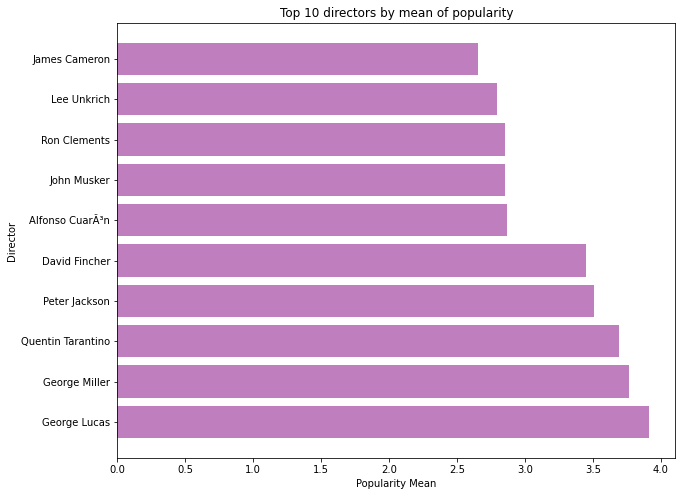

In [66]:
#Printing the top 10 ranking
print(aux8[['director','mean_popularity','num_movies','avg_year']])
plt.figure(figsize=(10, 8))
plt.title('Top 10 directors by mean of popularity', loc='center', pad=None)
plt.ylabel('Director')
plt.xlabel('Popularity Mean')
plt.barh([i for i in range(10)], aux8['mean_popularity'],tick_label=aux8['director'], color='purple', alpha=0.5)

>When it comes to popularity, we can see in the last chart that older movies had lower popularity scores, even in the top ten. As for the more recent movies, Christopher Nolan clearly stands out, with an average of 6,19 that includes ten movies.

### Research Question 3: Which genres usually present higher revenues/scores/popularity?

>Similar to the previous questions, let's create a ranking of the top 5 genres considering each of the dependent variables: revenue, popularity and average vote.

In [67]:
#I will start by creating all the dataframes that I will need based on what was done in the first section.
aux = data_genre.groupby('genres', as_index=False).agg(sum_revenue= ('revenue_adj','sum'),mean_revenue=('revenue_adj','mean'),mean_avg_vote=('vote_average','mean'),mean_popularity=('popularity','mean'),num_movies=('revenue_adj','count'),avg_year=('release_year','mean'))
aux = aux[aux['num_movies'] > aux['num_movies'].mean()]

#### Dependent variable 1: Revenue

       genres  num_movies
0      Action        2384
1   Adventure        1471
6       Drama        4760
3      Comedy        3793
17   Thriller        2907


<BarContainer object of 5 artists>

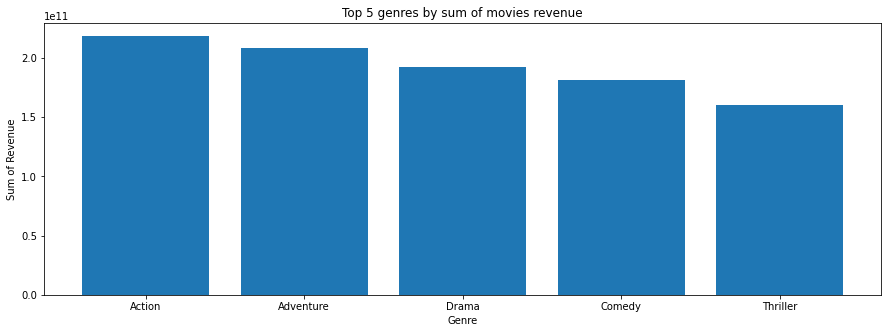

In [68]:
#Now, let's plot a few tables and charts to see the top 5.
aux1 = aux.sort_values('sum_revenue', ascending=False).head(5)
print(aux1[['genres', 'num_movies']])
plt.figure(figsize=(15, 5))
plt.title('Top 5 genres by sum of movies revenue', loc='center', pad=None)
plt.xlabel('Genre')
plt.ylabel('Sum of Revenue')
plt.bar([i for i in range(5)], aux1['sum_revenue'],tick_label=aux1['genres'])

       genres  num_movies
1   Adventure        1471
0      Action        2384
4       Crime        1354
17   Thriller        2907
14    Romance        1712


<BarContainer object of 5 artists>

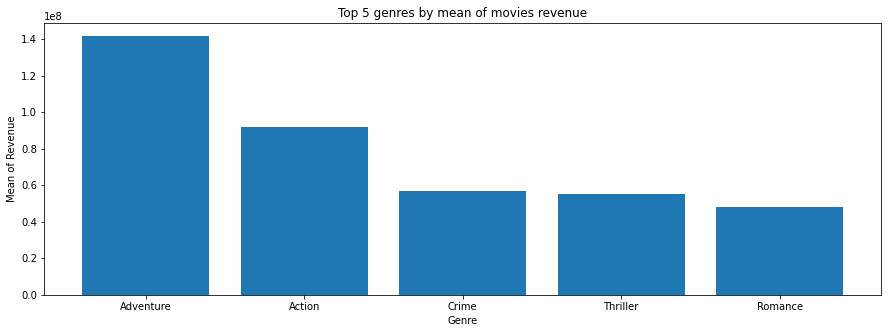

In [69]:
#Printing the top 5 ranking
aux2 = aux.sort_values('mean_revenue', ascending=False).head(5)
print(aux2[['genres', 'num_movies']])
plt.figure(figsize=(15, 5))
plt.title('Top 5 genres by mean of movies revenue', loc='center', pad=None)
plt.xlabel('Genre')
plt.ylabel('Mean of Revenue')
plt.bar([i for i in range(5)], aux2['mean_revenue'],tick_label=aux2['genres'])

>Although Adventure and Action have the lowest number of movies made in the top five, they both stand out in sum of revenue and mean of revenue.

#### Dependent variable 2: Vote Average

       genres  num_movies
6       Drama        4760
4       Crime        1354
14    Romance        1712
1   Adventure        1471
3      Comedy        3793


<BarContainer object of 5 artists>

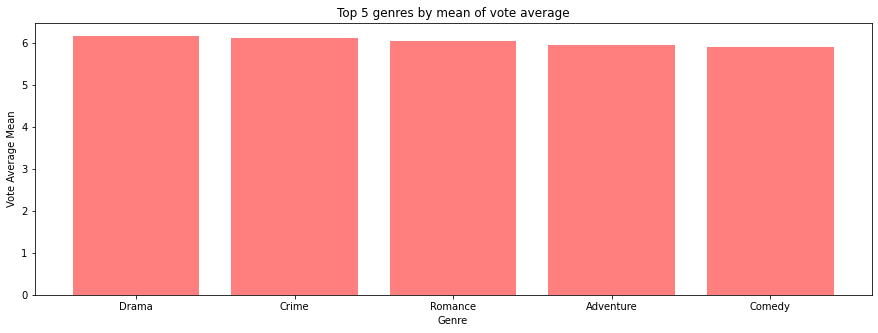

In [70]:
#Printing the top 5 ranking
aux3 = aux.sort_values('mean_avg_vote', ascending=False).head(5)
print(aux3[['genres', 'num_movies']])
plt.figure(figsize=(15, 5))
plt.title('Top 5 genres by mean of vote average', loc='center', pad=None)
plt.xlabel('Genre')
plt.ylabel('Vote Average Mean')
plt.bar([i for i in range(5)], aux3['mean_avg_vote'],tick_label=aux3['genres'],color='red',alpha=0.5)

>Documentary is the top genre when it comes to vote average, ant it's score is close to 7. The other components of the top 5 have similar scores.

#### Dependent variable 3: Popularity

       genres  num_movies
1   Adventure        1471
0      Action        2384
4       Crime        1354
17   Thriller        2907
3      Comedy        3793


<BarContainer object of 5 artists>

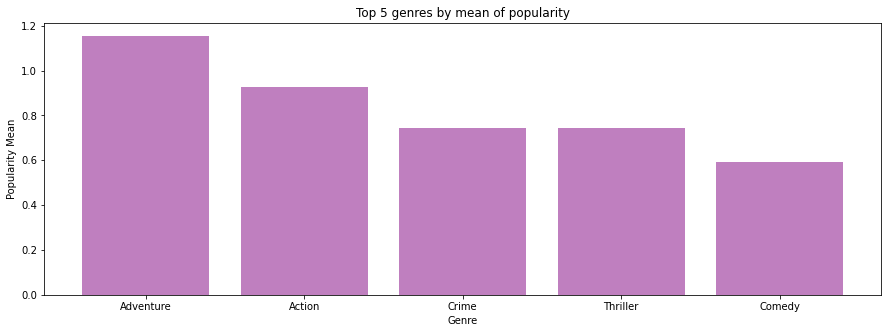

In [71]:
#Printing the top 5 ranking
aux4 = aux.sort_values('mean_popularity', ascending=False).head(5)
print(aux4[['genres', 'num_movies']])
plt.figure(figsize=(15, 5))
plt.title('Top 5 genres by mean of popularity', loc='center', pad=None)
plt.xlabel('Genre')
plt.ylabel('Popularity Mean')
plt.bar([i for i in range(5)], aux4['mean_popularity'],tick_label=aux4['genres'],color='purple',alpha=0.5)

>Adventure stands out again in the top 5 ranking of populary. We also see a bit more of Fantasy and Science Fiction in this ranking.

<a id='conclusions'></a>
## Conclusions

> **- Is the movie revenue higher when a certain actor/group of actors is part of the cast?** 
Not necessarily. Some artists like Emma Watson and Carrie Fischer have a high mean of movies revenue and have been in a lot of movies, so we can say that they influence to a higher movie revenue. But that does not apply to many of the other artists in the list. For example, there are artists that have been in only one movie and made the top ten sum of movies revenue, so we can't say that that level of revenue is because of the artist since we do not have any more history on them. Also, the revenue seems to have increased a lot with time, which I suspect is due to more access of the population to movies and development of movie making technology. 

>**- Does that also influence the movie's average score or the movie's popularity?**
A few artists have higher movie's average vote, but they've been in a low quantity of movies, so we can't garantee that they are the reason for the movie's average score. When it comes to popularity, Chris Pratt can make the top then of recent movies having been in 10 movies, and Carrie Fiscer makes the top ten of older movies with a total of 13 movies, so we can say that these two are related to movie popularity. This is a score that can change a lot, though, because today a lot of new artists become popular and unpopular really fast.


>**- Is the movie revenue higher when a certain person is directing the movie?** Yes: George Lucas and James Cameron seen to have a history of higher movie revenues.


>**- Does the director also influence the movie's average score  or the movie's popularity?** Yes: Christopher Nolan usually has higher movie's average vote if we consider the number of movies they've made, and Christopher Nolan also stands out in the ranking of popularity.

> **- Which genres usually present higher revenues/scores/popularity?** Action and Adventure present higher revenue, Documentary present higher vote average and Adveture along with Science Fiction and Fantasy are the winners of popularity.

# Limitations

> Although we could identify a few actors and directors that influence the movie's revenue/average vote/popularity, there is no garantee that there were no other factors that influences on these movies scores. For exemple, when analysing the influence of cast in the revenue, I noted that more recent movies usually have a higher revenue, and I suspect it is because of increase in access to movies and development of movie making technology. On the other hand, the dataset provides no data about those variables that could help me test that hypothesis. 

>Also, the data analysed is composed by a lot of variables that are in categories, and not in continuous numerical format, so it was difficult to aplly operations such as correlation calculations.

>Other limitations:
>- Number of zero values in the revenue data is very high;
>- I have an hypothesis that popularity index should go from 0 to 1, and the values in the dataset that are higher than 1 must have been messed up by some problem related to number format. Since I have no information if the index should really go from 0 to 1, this problem is a limitation to our analysis, because if that is true, all artists, directors and genres which popularities scores made it up to the top ten/five ranking are actually dammaged data.
>- Most actors/actresses and directors have been in/made a very small quantity of movies, which can influence in their mean revenue, mean vote average and mean popularity and therefore impact in the analysis.